In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Breast_Cancern.csv')
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
426,907409,B,10.48,14.98,67.49,333.6,0.09816,0.10130,0.06335,0.02218,...,12.13,21.57,81.41,440.4,0.13270,0.2996,0.2939,0.09310,0.3020,0.09646
17,84862001,M,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,...,20.96,31.48,136.80,1315.0,0.17890,0.4233,0.4784,0.20730,0.3706,0.11420
43,856106,M,13.28,20.28,87.32,545.2,0.10410,0.14360,0.09847,0.06158,...,17.38,28.00,113.10,907.2,0.15300,0.3724,0.3664,0.14920,0.3739,0.10270
450,9111596,B,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,...,12.79,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952
497,914580,B,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,...,14.06,24.34,92.82,607.3,0.12760,0.2506,0.2028,0.10530,0.3035,0.07661
154,8711002,B,13.15,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.03483,...,14.77,20.50,97.67,677.3,0.14780,0.2256,0.3009,0.09722,0.3849,0.08633
23,851509,M,21.16,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,...,29.17,35.59,188.00,2615.0,0.14010,0.2600,0.3155,0.20090,0.2822,0.07526
129,866674,M,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.25450,0.11490,...,22.63,33.58,148.70,1589.0,0.12750,0.3861,0.5673,0.17320,0.3305,0.08465
131,8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
106,863031,B,11.64,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,...,13.14,29.26,85.51,521.7,0.16880,0.2660,0.2873,0.12180,0.2806,0.09097


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Model Performance Evaluators
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [4]:
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
#Value counts of unique data types in our dataframe
df.dtypes.value_counts()

float64    30
int64       1
Name: count, dtype: int64

In [7]:
df[df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


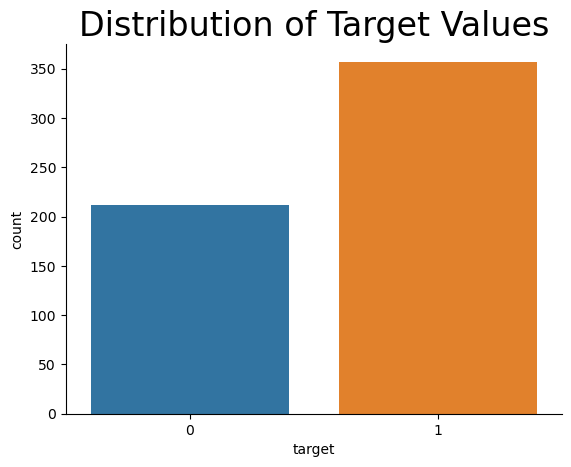

In [8]:
sns.countplot(x='target', data=df, dodge=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Distribution of Target Values', fontsize=24)

plt.show()

In [13]:
from scipy import stats

In [22]:
num_cols = list(df.select_dtypes('float64').columns)
unrelated_num_cols = []
categorical_col = 'target'

for i in num_cols:
    grouped_data = [df[i][df[categorical_col] == category] for category in df[categorical_col].unique()]
    statistic, p_value = stats.f_oneway(*grouped_data)

    alpha = 0.05

    if p_value < alpha:
        print( f"ANOVA statistic: {round(statistic, 2)}")
        print(f"p-value: {p_value}")
        print("\033[32m" + f"Reject the null hypothesis: There is a significant relationship between {i} and {categorical_col}")
        print("\033[0m")  
    else:
        print( f"ANOVA statistic: {round(statistic, 2)}")
        print(f"p-value: {p_value}")
        print("\033[31m" + f"No significant relationship between {i} and {categorical_col}")
        print("\033[0m")  
        unrelated_num_cols.append(i)
     

ANOVA statistic: 646.98
p-value: 8.46594057226382e-96
Reject the null hypothesis: There is a significant relationship between mean radius and target

ANOVA statistic: 118.1
p-value: 4.0586360478986136e-25
Reject the null hypothesis: There is a significant relationship between mean texture and target

ANOVA statistic: 697.24
p-value: 8.43625103617395e-101
Reject the null hypothesis: There is a significant relationship between mean perimeter and target

ANOVA statistic: 573.06
p-value: 4.7345643103077244e-88
Reject the null hypothesis: There is a significant relationship between mean area and target

ANOVA statistic: 83.65
p-value: 1.051850359203376e-18
Reject the null hypothesis: There is a significant relationship between mean smoothness and target

ANOVA statistic: 313.23
p-value: 3.938263105887389e-56
Reject the null hypothesis: There is a significant relationship between mean compactness and target

ANOVA statistic: 533.79
p-value: 9.966555755074321e-84
Reject the null hypothesis: T

In [23]:
print(f'The columns that failed the ANOVA test are {unrelated_num_cols}. These columns don\'t help in making predictions.')

The columns that failed the ANOVA test are ['mean fractal dimension', 'texture error', 'smoothness error', 'symmetry error', 'fractal dimension error']. These columns don't help in making predictions.


In [24]:
import plotly.express as px

In [25]:
fig = px.scatter(df,
                 x='mean texture',
                 color='target',
                 size='mean texture',
                 template='simple_white',
                 title='Cancer Mean Texture Spread',
                 labels={"mean texture": "Mean Texture", "target":"Target"},
                 hover_data=["target"])

fig.update_layout(xaxis_title="Mean Texture",yaxis_title=" ")

fig.show()

In [26]:
fig = px.scatter(df,
                 x="mean compactness",
                 size="mean compactness",
                 color="mean compactness",
                  labels={"mean compactness": "Mean Compactness"},
                 hover_data=["target"],
                 template='simple_white',
                 title="Cancer Compactness Mean")
fig.update_layout(xaxis_title="Mean Compactness",yaxis_title=" ")
fig.show()

In [27]:
fig = px.scatter(df,
                 x="symmetry error",
                 size='symmetry error',
                 color = 'symmetry error',
                 hover_data=["target"],
                 template='seaborn',
                 labels={"symmetry error": "Symmetry Error"},
                 title="Symmetry Error Spread")
fig.update_layout(xaxis_title="Symmetry Error",yaxis_title=" ")
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()

In [28]:
fig = px.scatter(df,
                 x="mean concave points",
                 size='mean concave points',
                 color="mean concave points",
                 hover_data=["target"],
                 template="simple_white",
                 labels={"mean concave points": "Mean Concave Points"},
                 title="Mean Concave Points Spread")
fig.update_layout(xaxis_title="Mean concave points",yaxis_title=" ")
fig.show()

In [29]:
df.drop(labels=unrelated_num_cols, axis=1, inplace=True)

In [30]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'radius error',
       'perimeter error', 'area error', 'compactness error', 'concavity error',
       'concave points error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'target'],
      dtype='object')

In [31]:
input_cols = df.columns[:-1]
target_col =  df.columns[-1]

In [32]:
inputs_df = df[list(input_cols)].copy()
inputs_df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,radius error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
100,13.61,24.98,88.05,582.7,0.09488,0.08511,0.086250,0.044890,0.1609,0.4565,...,16.99,35.27,108.60,906.5,0.12650,0.19430,0.31690,0.11840,0.2651,0.07397
185,10.08,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,0.4245,...,11.87,21.18,75.39,437.0,0.15210,0.10190,0.00692,0.01042,0.2933,0.07697
77,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.168400,0.108000,0.2152,0.9806,...,22.39,18.91,150.10,1610.0,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080
142,11.43,17.31,73.66,398.0,0.10920,0.09486,0.020310,0.018610,0.1645,0.2843,...,12.78,26.76,82.66,503.0,0.14130,0.17920,0.07708,0.06402,0.2584,0.08096
296,10.91,12.35,69.14,363.7,0.08518,0.04721,0.012360,0.013690,0.1449,0.1753,...,11.37,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643


In [33]:
targets = df[(target_col)]
targets.sample(5)

96     1
379    0
143    1
470    1
282    0
Name: target, dtype: int64

In [34]:
scaler = MinMaxScaler()
scaler.fit(inputs_df[input_cols])
inputs_df[input_cols] = scaler.transform(inputs_df[input_cols])
inputs_df[input_cols].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,radius error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.356147,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.156437,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.229622,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,0.139091,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.233822,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [35]:
column_values = []
for i in range(len(inputs_df.columns)):
    column_values.append(inputs_df.iloc[:,i].values)

covariance_matrix = np.cov(column_values)

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [36]:
print("Shape of eigenvalues:", eigen_values.shape)
print("Shape of eigenvectors:", eigen_vectors.shape)
print("Shape of covariance matrix:", covariance_matrix.shape)

Shape of eigenvalues: (25,)
Shape of eigenvectors: (25, 25)
Shape of covariance matrix: (25, 25)


In [37]:
covariance_matrix[0]

array([0.027818  , 0.00785484, 0.02794603, 0.02458229, 0.00361231,
       0.01367458, 0.02108345, 0.02645754, 0.00341174, 0.01137405,
       0.01071215, 0.01042819, 0.00462112, 0.00246906, 0.0073333 ,
       0.02780391, 0.00811481, 0.02693902, 0.02196388, 0.0030081 ,
       0.0105267 , 0.01464405, 0.028038  , 0.00333488, 0.00013961])

In [38]:
eigen_vectors[0]

array([ 0.24595212, -0.28506715, -0.05288632,  0.04299417,  0.07429854,
        0.04581977,  0.07854236, -0.17635877, -0.03245573,  0.21481119,
        0.00737844,  0.01610437,  0.12459388, -0.18581714, -0.24581679,
       -0.17792538,  0.03830878,  0.13958935, -0.70693551,  0.1966754 ,
       -0.15904637,  0.07589162,  0.07905804,  0.11604536,  0.09432928])

In [39]:
print('The first eigen value is',round(eigen_values[0],4))

The first eigen value is 0.3301


In [40]:
explained_variance = []
c= 0
for i in range(len((eigen_values/(np.sum(eigen_values))*100))):
    c = c + np.around((eigen_values[i]/(np.sum(eigen_values))*100),3)
    while c < 92:
        explained_variance.append(c)
        print(f'At {i+1} PC, Explained Variance is {round(c,2)}%')
        break

At 1 PC, Explained Variance is 59.5%
At 2 PC, Explained Variance is 74.84%
At 3 PC, Explained Variance is 82.28%
At 4 PC, Explained Variance is 87.3%
At 5 PC, Explained Variance is 90.78%


In [41]:
variance_percentage = np.around(explained_variance[-1], 2)
num_principal_components = len(explained_variance)

print(f"Explained Variance Achieved : {variance_percentage}% , PCs needed : {num_principal_components}")

Explained Variance Achieved : 90.78% , PCs needed : 5


In [42]:
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

def plot_vectors(vectors, colors, labels):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each.

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]]
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.

    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'], ['Vector 1', 'Vector 2'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],angles='xy', scale_units='xy', scale=1, color=colors[i],label=labels[i])

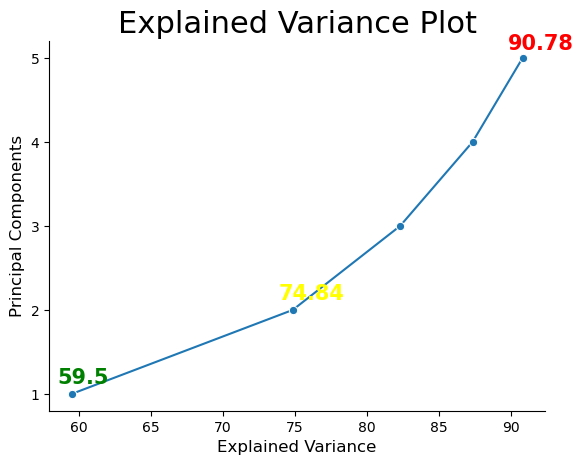

In [44]:
sns.lineplot(x=explained_variance,  y=range(1,len(explained_variance)+1), marker='o')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.annotate(f'{round(explained_variance[0],2)}', (round(explained_variance[0],2)-1, 1.12),
             fontsize=15, fontweight='bold', color='green')
plt.annotate(f'{round(explained_variance[1],2)}', (round(explained_variance[1],2)-1, 2.12),
             fontsize=15, fontweight='bold', color='yellow')
plt.annotate(f'{round(explained_variance[4],2)}', (round(explained_variance[4],2)-1, 5.1),
             fontsize=15, fontweight='bold', color='red')
plt.yticks(range(1,len(explained_variance)+1,1))
plt.title('Explained Variance Plot', fontsize=22)
plt.xlabel('Explained Variance', fontsize=12)
plt.ylabel('Principal Components',fontsize=12)
plt.show()

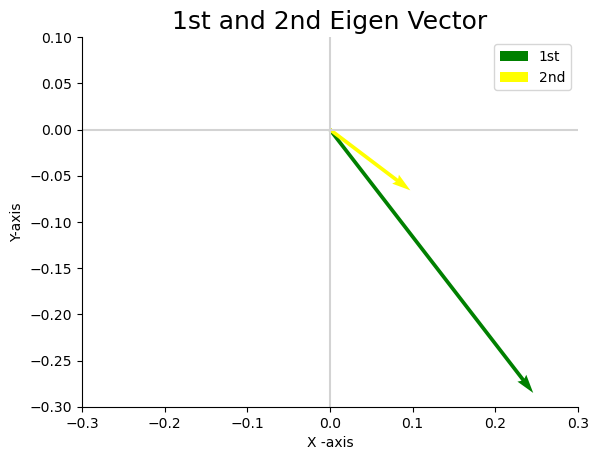

In [45]:
plot_vectors([eigen_vectors[0], eigen_vectors[1]] , ['green', 'yellow'], ['1st', '2nd'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('1st and 2nd Eigen Vector', fontsize=18)
plt.xlabel('X -axis')
plt.ylabel('Y-axis')
plt.xlim(-0.3, 0.3)
_ = plt.ylim(-0.3, 0.1)
plt.legend()
plt.show()

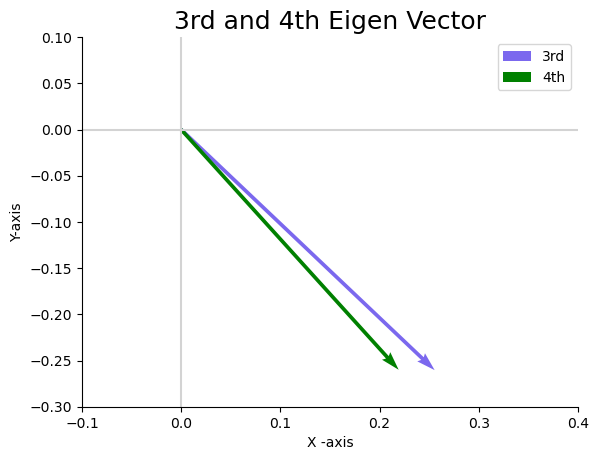

In [46]:
plot_vectors([eigen_vectors[2], eigen_vectors[3]] , ['mediumslateblue', 'green'], ['3rd', '4th'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('3rd and 4th Eigen Vector', fontsize=18)
plt.xlabel('X -axis')
plt.legend(['3rd Vector', '4th Vector'])
plt.ylabel('Y-axis')
plt.xlim(-0.1, 0.4)
_ = plt.ylim(-0.3, 0.1)
plt.legend()
plt.show()

In [47]:
pc = eigen_vectors[0:len(explained_variance)]
print(f'The shape of the Principal Component Matrix is {pc.shape}')

The shape of the Principal Component Matrix is (5, 25)


In [48]:
print('The Original PC array')
pc[0]

The Original PC array


array([ 0.24595212, -0.28506715, -0.05288632,  0.04299417,  0.07429854,
        0.04581977,  0.07854236, -0.17635877, -0.03245573,  0.21481119,
        0.00737844,  0.01610437,  0.12459388, -0.18581714, -0.24581679,
       -0.17792538,  0.03830878,  0.13958935, -0.70693551,  0.1966754 ,
       -0.15904637,  0.07589162,  0.07905804,  0.11604536,  0.09432928])

In [49]:
print('The Transpose of PC array')
pc.T[0]

The Transpose of PC array


array([0.24595212, 0.09735703, 0.25557267, 0.21928724, 0.10784383])

In [50]:
transformed_df = np.dot(inputs_df.iloc[:,0:len(inputs_df.columns)],pc.T)
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2','PC3', 'PC4', 'PC5'])
new_df['Target'] = df['target'].values
new_df.head()

,PC1,PC2,PC3,PC4,PC5,Target
0,0.034773,0.398491,0.686401,-1.055867,-0.138927,0
1,-0.154531,0.489669,0.468577,-0.786602,0.111376,0
2,-0.119872,0.437182,0.444838,-1.045942,0.024061,0
3,0.240011,0.060654,0.452463,-1.322787,-0.231652,0
4,-0.060162,0.451352,0.439179,-0.755014,0.015844,0


In [51]:
new_df['Target'] = new_df['Target'].astype('int')

In [55]:
fig = px.scatter(new_df, x='PC1', y='PC2', color='Target', template="simple_white")
fig.update_layout(title='Top 2 PCs Scatterplot', title_font_size=18)
fig.update_xaxes(showgrid=False, zeroline=True, zerolinewidth=3, zerolinecolor='lightgray')
fig.update_yaxes(showgrid=False, zeroline=True, zerolinewidth=3, zerolinecolor='lightgray')

fig.add_annotation(x=-0.45, y=0.1, text='Kuadran 2', font_size=14, font_color='red')
fig.add_annotation(x=0.23, y=0.1, text='Kuadran 1', font_size=14, font_color='black')

fig.update_xaxes(title='PC1')
fig.update_yaxes(title='PC2')

fig.show()

In [56]:
new_df[new_df.Target==0].sample(5)

,PC1,PC2,PC3,PC4,PC5,Target
83,-0.105564,0.378176,0.298362,-0.963324,-0.023326,0
277,-0.103512,0.384182,0.294750,-0.705234,0.075934,0
282,-0.064098,0.413513,0.485914,-1.011949,-0.019456,0
31,0.100619,0.099761,0.373219,-0.949803,-0.091750,0
432,-0.052377,0.390745,0.449872,-1.075797,-0.054841,0


In [57]:
new_df[new_df.Target==1].sample(5)

,PC1,PC2,PC3,PC4,PC5,Target
557,-0.032205,-0.027727,0.033919,-0.397758,0.059640,1
157,-0.096229,0.348330,0.191499,-0.475570,0.184131,1
497,0.025751,0.144955,0.219617,-0.590393,-0.040664,1
518,0.032750,0.119801,0.261227,-0.639539,-0.222658,1
204,0.031472,0.133313,0.247999,-0.665805,-0.066862,1


In [58]:
label, counts = np.unique(targets, return_counts=True)
counts = max(counts) / counts
class_weights = dict(zip(label, counts))

print('=== CLASS WEIGHTS ===')
print(class_weights)

=== CLASS WEIGHTS ===
{0: 1.6839622641509433, 1: 1.0}


In [59]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(new_df, targets, test_size=0.25, random_state=42)

In [60]:
print('X_train Shape -',train_inputs.shape,',', 'y_train Shape -', train_targets.shape)
print('X_test shape -', val_inputs.shape,',','y_test shape -', val_targets.shape)

X_train Shape - (426, 6) , y_train Shape - (426,)
X_test shape - (143, 6) , y_test shape - (143,)


In [61]:
names = ['Logistic Regression', "KNN", "Linear SVM","Gradient Boosting", "Decision Tree", "Random Forest"]
classifiers = [
    LogisticRegression(solver='liblinear', class_weight=class_weights, random_state=42),
    KNeighborsClassifier(n_neighbors=3, weights= 'distance'),
    SVC(kernel="linear", C=0.025, class_weight=class_weights, random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    DecisionTreeClassifier(max_depth=5, class_weight=class_weights, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=100, class_weight=class_weights, random_state=42)]

In [62]:
num_folds = 5 

scores = []

for name, clf in zip(names, classifiers):
    cv_scores = cross_val_score(clf, train_inputs, train_targets, cv=num_folds)
    mean_score = np.mean(cv_scores)
    scores.append(mean_score)

scores_df = pd.DataFrame()
scores_df['Name'] = names
scores_df['CV Mean score'] = np.around(scores, 3)

sorted_scores_df = scores_df.sort_values('CV Mean score', ascending=False)
sorted_scores_df

,Name,CV Mean score
0,Logistic Regression,1.0
1,KNN,1.0
2,Linear SVM,1.0
3,Gradient Boosting,1.0
4,Decision Tree,1.0
5,Random Forest,1.0


In [64]:
class_weights = {0: 1, 1: 2}  

model = LogisticRegression(solver='liblinear', random_state=42, class_weight=class_weights)

model.fit(train_inputs, train_targets)

LRtrain_preds = model.predict(val_inputs)

confusionmatrix = np.around(confusion_matrix(val_targets, LRtrain_preds, normalize='true'), 3)

fig = px.imshow(confusionmatrix, template='ggplot2', text_auto=True, aspect="auto",
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()



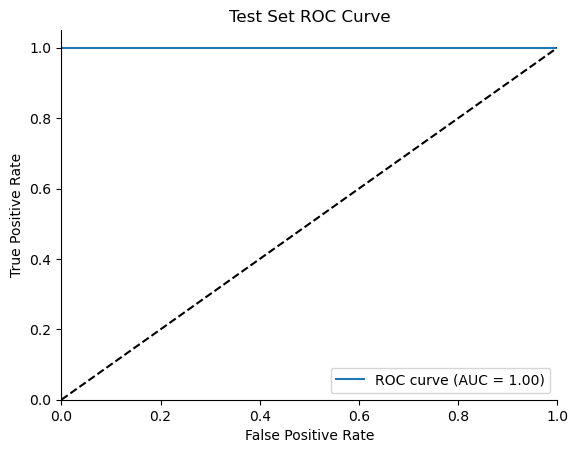

In [65]:
y_pred = model.predict(val_inputs) 
fpr, tpr, thresholds = roc_curve(val_targets, y_pred)

auc = roc_auc_score(val_targets, y_pred)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [66]:
print(classification_report(val_targets, LRtrain_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        89

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



In [67]:
misclassified_count = np.sum(val_targets != LRtrain_preds)
total_cases = len(val_targets)
error_rate = np.around((misclassified_count / total_cases) * 100, 3)

print(f"{misclassified_count} / {total_cases} cases misclassified by LR model, Error rate : {error_rate}%.")

0 / 143 cases misclassified by LR model, Error rate : 0.0%.


In [68]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [69]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)
print("Original Data shape:",X.shape, "\nModified Data shape:", X_lda.shape)

Original Data shape: (569, 25) 
Modified Data shape: (569, 1)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

In [71]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [72]:
LDAtrain_preds = lda.predict(X_train)
confusionmatrix = np.around(confusion_matrix(y_train, LDAtrain_preds, normalize='true'),3)

fig = px.imshow(confusionmatrix,
                template='simple_white',
                text_auto=True,
                aspect="auto",
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

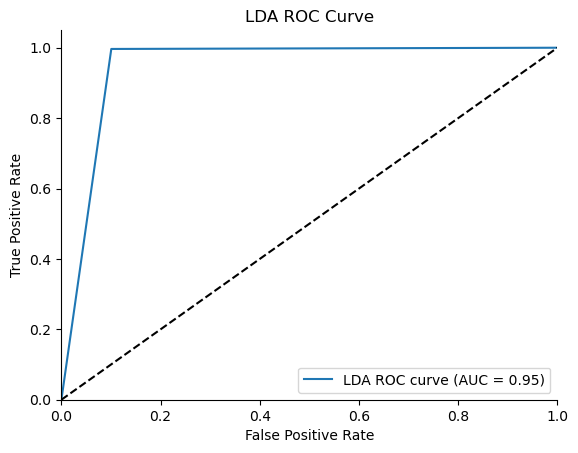

In [73]:
y_pred = lda.predict(X_train) 
fpr, tpr, thresholds = roc_curve(y_train, y_pred)


auc = roc_auc_score(y_train, y_pred)

plt.figure()
plt.plot(fpr, tpr, label='LDA ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [74]:
misclassified_count = len(y_train[y_train != LDAtrain_preds])
total_cases = len(y_train)
error_rate = np.around((misclassified_count / total_cases) * 100, 3)

print(f"{misclassified_count} / {total_cases} cases misclassified by LDA, Error rate : {error_rate}%.")

18 / 455 cases misclassified by LDA, Error rate : 3.956%.


In [76]:
pip install ydata_profiling

  Using cached ydata_profiling-4.6.4-py2.py3-none-any.whl.metadata (20 kB)
  Using cached pydantic-2.5.3-py3-none-any.whl.metadata (65 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py) ... done
  Using cached multimethod-1.10-py3-none-any.whl.metadata (8.2 kB)
  Using cached typeguard-4.1.5-py3-none-any.whl.metadata (3.7 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached dacite-1.8.1-py3-none-any.whl.metadata (15 kB)
  Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl (4.7 MB)
  Using cached annotated_types-0.6.0-py3-none-any.whl.metadata (12 kB)
Using cached ydata_profiling-4.6.4-py2.py3-none-any.whl (357 kB)
Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
Using cached multimethod-1.10-py3-none-any.whl (9.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.6/660.6 kB 4.5 MB/s eta 0:00:0000:0100:01
Using cached pydantic-2.5.3-py3-none-any.whl (381 kB)
   ━━━━━

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.5.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [77]:
import pickle

pickle.dump(LogisticRegression,open('ronibiasanto1.pkl','wb'))